In [7]:
# Pacotes
import scipy as sci
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
import scipy.integrate


In [8]:
# Constante Gravitacional
G=6.67408e-11 #[N-m2/kg2]
# Dados
m_nd=1.989e+30 #[kg] #Massa do Sol
r_nd=5.326e+12 #[m] # Distânica entre as estrelas
v_nd=30000 #[m/s] # Velocidade relativa
t_nd=1*365*24*3600 #[s] #Período orbital
# Constantes Simplificadas
K1=G*t_nd*m_nd/(r_nd**2*v_nd)
K2=v_nd*t_nd/r_nd


In [9]:
# Massas
m1=10 #Massa Estrela 1 [Msol]
m2=10 #Massa estrelas 2 [Msol]
# Vetores de posição inicial
r1=[-0.5,0,0]
r2=[0.5,0,0]
# Convertendo vetores para matrizes
r1=np.array(r1,dtype="float64")
r2=np.array(r2,dtype="float64")
# Centro de Massa (Center of mass)
r_com=(m1*r1+m2*r2)/(m1+m2)
# Definindo Velocidades Iniciais
v1=[0.1,0,0.1]
v2=[-0.1,0,-0.1]
# Passando vetores velocidade para matrizes
v1=np.array(v1,dtype="float64")
v2=np.array(v2,dtype="float64")
# Encontrando velocidade do Centro de MAssa
v_com=(m1*v1+m2*v2)/(m1+m2)

In [12]:
#Função definindo as equações de movimento
def TwoBodyEquations(w,t,G,m1,m2):
 r1=w[:3]
 r2=w[3:6]
 v1=w[6:9]
 v2=w[9:12]
 r=sci.linalg.norm(r2-r1) # Calcula magnitude do vetor normal
 dv1bydt=K1*m2*(r2-r1)/r**3
 dv2bydt=K1*m1*(r1-r2)/r**3
 dr1bydt=K2*v1
 dr2bydt=K2*v2
 r_derivs=np.concatenate((dr1bydt,dr2bydt))
 derivs=np.concatenate((r_derivs,dv1bydt,dv2bydt))
 return derivs

In [16]:
# Parametros iniciais
init_params=np.array([r1,r2,v1,v2]) # Matriz de parametros
init_params=init_params.flatten() # Reduzindo para 1D
time_span=np.linspace(0,30,1000) # 30 periodos orbitais e 1000 pontos
# Solucionar EDOs
import scipy.integrate
two_body_sol=sci.integrate.odeint(TwoBodyEquations,init_params,time_span,args=(G,m1,m2))

In [17]:
r1_sol=two_body_sol[:,:3]
r2_sol=two_body_sol[:,3:6]


In [18]:
# Posição centro de massa
rcom_sol=(m1*r1_sol+m2*r2_sol)/(m1+m2)
# Posição COM estrela 1
r1com_sol=r1_sol-rcom_sol
# Posição COM estrela 2
r2com_sol=r2_sol-rcom_sol

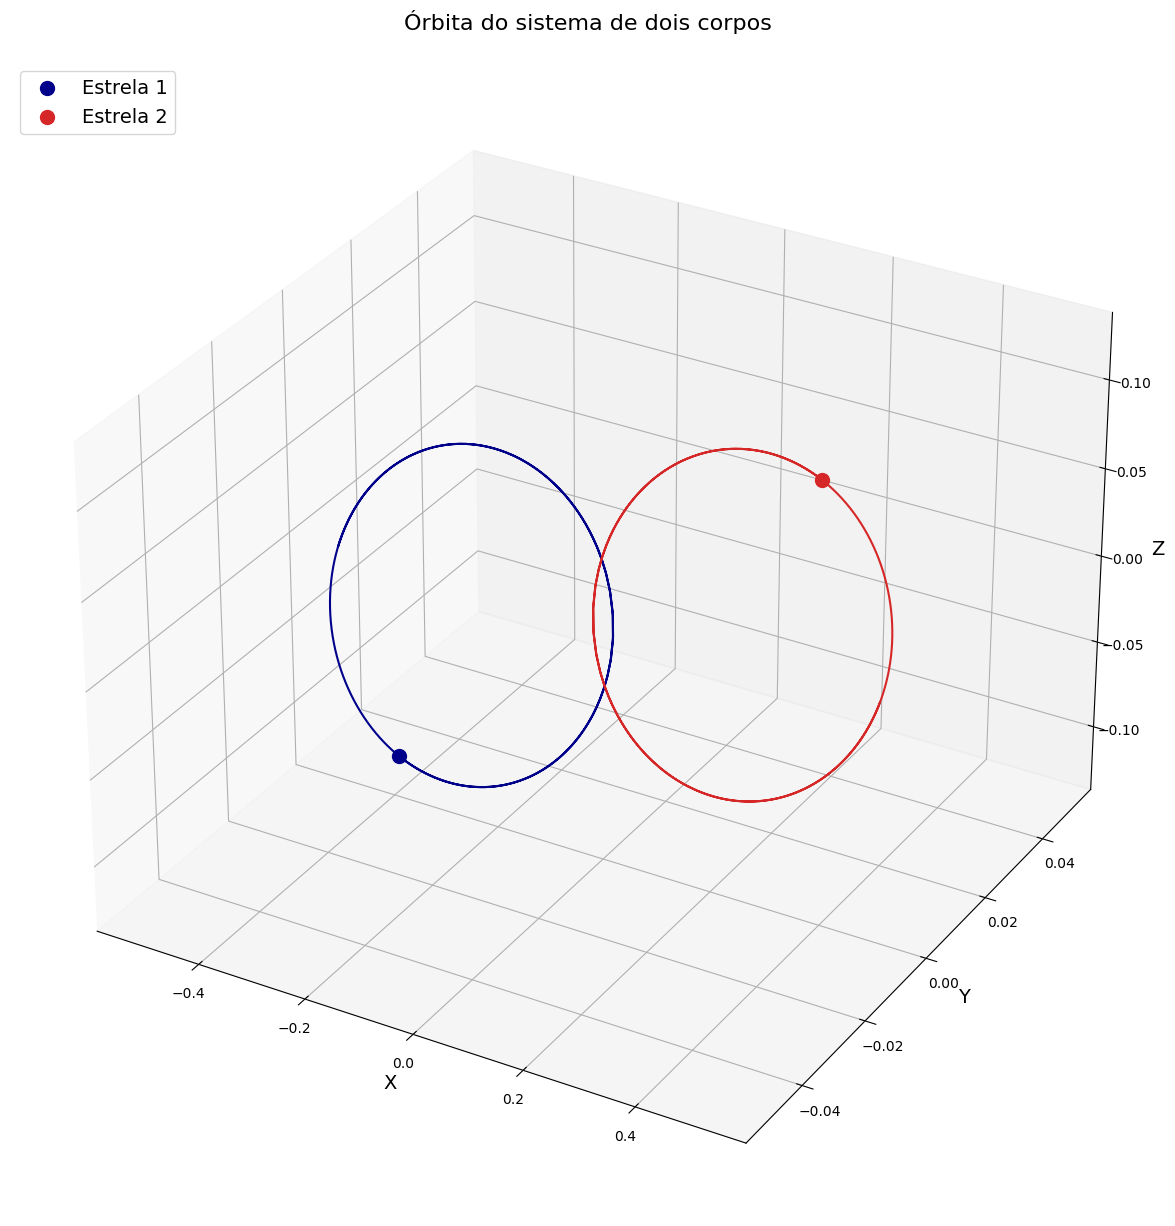

In [23]:
# Criando Figura
fig=plt.figure(figsize=(15,15))
# Eixos 3D
ax=fig.add_subplot(111,projection="3d")
# Plotando orbitas
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
# Plotando posição final das estrelas
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Estrela 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Estrela 2")
# Legendas
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Y",fontsize=14)
ax.set_zlabel("Z",fontsize=14)
ax.set_title("Órbita do sistema de dois corpos\n",fontsize=16)
ax.legend(loc="upper left",fontsize=14)

In [24]:
######## Acrescentando Planeta ########
# Massa do Planeta
m3= 0.0001 # [Msol]
# Posição planeta
r3=[15,0,0] #em linha com as duas estrelas
r3=np.array(r3,dtype="float64")
# Velocidade Planeta
v3=[0,0,0.1] #Perpendicular as estrelas
v3=np.array(v3,dtype="float64")


In [25]:
#Função equações de movimento de 3 corpos
def ThreeBodyEquations(w,t,G,m1,m2,m3):
 r1=w[:3]
 r2=w[3:6]
 r3=w[6:9]
 v1=w[9:12]
 v2=w[12:15]
 v3=w[15:18]
 r12=sci.linalg.norm(r2-r1)
 r13=sci.linalg.norm(r3-r1)
 r23=sci.linalg.norm(r3-r2)
 dv1bydt=(K1*m2*(r2-r1)/r12**3)+(K1*m3*(r3-r1)/r13**3)
 dv2bydt=(K1*m1*(r1-r2)/r12**3)+(K1*m3*(r3-r2)/r23**3)
 dv3bydt=(K1*m1*(r1-r3)/r13**3)+(K1*m2*(r2-r3)/r23**3)
 dr1bydt=K2*v1
 dr2bydt=K2*v2
 dr3bydt=K2*v3
 r12_derivs=np.concatenate((dr1bydt,dr2bydt))
 r_derivs=np.concatenate((r12_derivs,dr3bydt))
 v12_derivs=np.concatenate((dv1bydt,dv2bydt))
 v_derivs=np.concatenate((v12_derivs,dv3bydt))
 derivs=np.concatenate((r_derivs,v_derivs))
 return derivs

In [27]:
# Parametros iniciais
init_params=np.array([r1,r2,r3,v1,v2,v3]) # Matriz parametros iniciais
init_params=init_params.flatten() # Reduzindo para 1D
time_span=np.linspace(0,50000,2000) # 50000 periodos orbitais 2000 pontos
# Solucionar EDO
three_body_sol=sci.integrate.odeint(ThreeBodyEquations,init_params,time_span,args=(G,m1,m2,m3))

In [28]:
r1_sol=three_body_sol[:,:3]
r2_sol=three_body_sol[:,3:6]
r3_sol=three_body_sol[:,6:9]


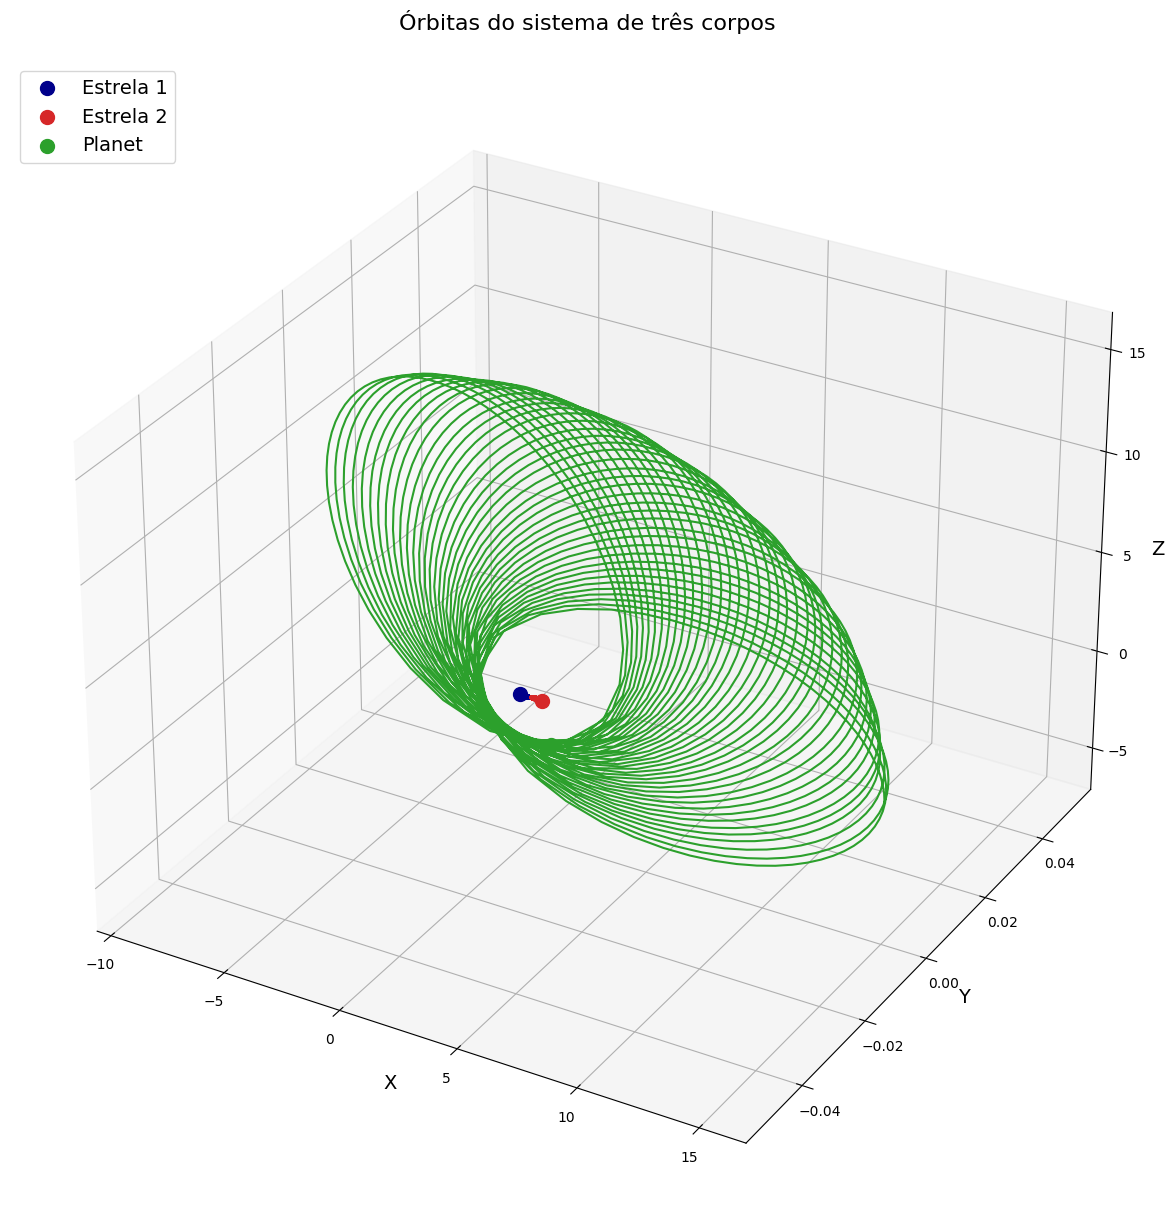

In [30]:
#Criando figura
fig=plt.figure(figsize=(15,15))
#Eixos 3D 
ax=fig.add_subplot(111,projection="3d")
#Plot  das órbitas
ax.plot(r1_sol[:,0],r1_sol[:,1],r1_sol[:,2],color="darkblue")
ax.plot(r2_sol[:,0],r2_sol[:,1],r2_sol[:,2],color="tab:red")
ax.plot(r3_sol[:,0],r3_sol[:,1],r3_sol[:,2],color="tab:green")

#Plot da posição final dos corpos
ax.scatter(r1_sol[-1,0],r1_sol[-1,1],r1_sol[-1,2],color="darkblue",marker="o",s=100,label="Estrela 1")
ax.scatter(r2_sol[-1,0],r2_sol[-1,1],r2_sol[-1,2],color="tab:red",marker="o",s=100,label="Estrela 2")
ax.scatter(r3_sol[-1,0],r3_sol[-1,1],r3_sol[-1,2],color="tab:green",marker="o",s=100,label="Planet")

#Legendas
ax.set_xlabel("X",fontsize=14)
ax.set_ylabel("Y",fontsize=14)
ax.set_zlabel("Z",fontsize=14)
ax.set_title("Órbitas do sistema de três corpos\n",fontsize=16)
ax.legend(loc="upper left",fontsize=14)

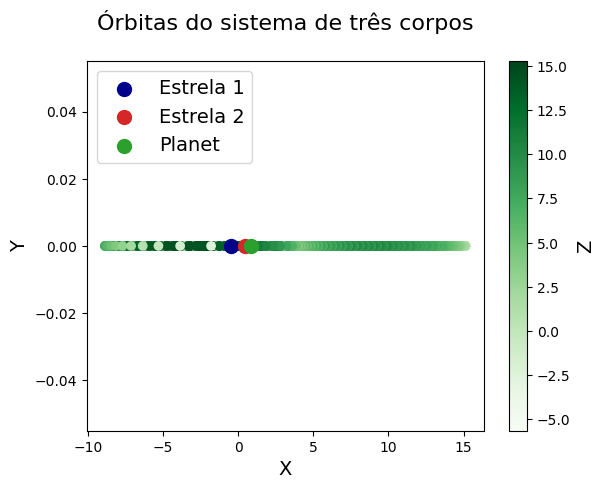

In [37]:
# Plot das órbitas
plt.scatter(r1_sol[:, 0], r1_sol[:, 1], c=r1_sol[:, 2], cmap='Blues')
plt.scatter(r2_sol[:, 0], r2_sol[:, 1], c=r2_sol[:, 2], cmap='Reds')
plt.scatter(r3_sol[:, 0], r3_sol[:, 1], c=r3_sol[:, 2], cmap='Greens')

# Barra de cores
cbar = plt.colorbar()
cbar.set_label('Z', fontsize=14)

# Plot da posição final dos corpos
plt.scatter(r1_sol[-1, 0], r1_sol[-1, 1], color="darkblue", marker="o", s=100, label="Estrela 1")
plt.scatter(r2_sol[-1, 0], r2_sol[-1, 1], color="tab:red", marker="o", s=100, label="Estrela 2")
plt.scatter(r3_sol[-1, 0], r3_sol[-1, 1], color="tab:green", marker="o", s=100, label="Planet")

#plt.xlim (-5, 5)
#plt.ylim (0, 15)

# Legendas
plt.xlabel("X", fontsize=14)
plt.ylabel("Y", fontsize=14)
plt.title("Órbitas do sistema de três corpos\n", fontsize=16)
plt.legend(loc="upper left", fontsize=14)

plt.show()